<a href="https://colab.research.google.com/github/alessio76/Progetto-ML/blob/main/KNNmio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Moduli di scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, ParameterGrid, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import DistanceMetric
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
from numpy import linalg as la
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



In [ ]:
def find_indices(input_array,label):
  indices = np.where(input_array == label)
  return indices

In [ ]:
def plot(x1, x2):
    plt.scatter(x1[:,0], x1[:,1], c='r', marker = '.')
    plt.scatter(x2[:,0], x2[:,1], c='b', marker = '.')
    plt.show()    

In [ ]:
def grid_search(training_set, param_grid, n_folds, training_labels):
  classifier =  KNeighborsClassifier()
  grid_search_cv = GridSearchCV(classifier, param_grid, cv=n_folds)
  grid_search_cv.fit(training_set,training_labels)
  print('Combinazione migliore:\n', grid_search_cv.best_params_)
  print('Accuratezza media della combinazione migliore: %.3f' % grid_search_cv.best_score_)
  classifier = KNeighborsClassifier(**grid_search_cv.best_params_)
  classifier.fit(training_set, training_labels)
  return classifier

'''mahalanobisClassifier = KNeighborsClassifier(n_neighbors=9, algorithm='brute', metric='mahalanobis',metric_params={'V': np.cov(x)})
mahalanobisClassifier.fit(train_x,train_y)'''


"mahalanobisClassifier = KNeighborsClassifier(n_neighbors=9, algorithm='brute', metric='mahalanobis',metric_params={'V': np.cov(x)})\nmahalanobisClassifier.fit(train_x,train_y)"

In [ ]:
def predict_values(classifier, test_set, training_set):
  y_test = classifier.predict(test_set)
  y_train = classifier.predict(training_set)
  return y_test, y_train 
'''pred_y_test_mahalanobis = mahalanobisClassifier.predict(test_x)
pred_y_train_mahalanobis = mahalanobisClassifier.predict(train_x)'''

'pred_y_test_mahalanobis = mahalanobisClassifier.predict(test_x)\npred_y_train_mahalanobis = mahalanobisClassifier.predict(train_x)'

In [ ]:
def scoring(pred_y_test, pred_y_train, test_y, train_y):  
  print(metrics.classification_report(test_y, pred_y_test))
  print(metrics.classification_report(train_y, pred_y_train))
  mat = confusion_matrix(test_y, pred_y_test)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

'''print(metrics.classification_report(test_y,pred_y_test_mahalanobis))
print(metrics.classification_report(train_y, pred_y_train_mahalanobis))'''

  

'print(metrics.classification_report(test_y,pred_y_test_mahalanobis))\nprint(metrics.classification_report(train_y, pred_y_train_mahalanobis))'

In [ ]:
#dataset è un dizionario
dataset = load_breast_cancer()
x,y = dataset["data"], dataset["target"]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.3, random_state=1)
print(train_x.shape, test_x.shape)

(398, 30) (171, 30)


Combinazione migliore:
 {'metric': 'euclidean', 'n_neighbors': 11}
Accuratezza media della combinazione migliore: 0.927
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        63
           1       0.93      0.97      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       149
           1       0.93      0.97      0.95       249

    accuracy                           0.93       398
   macro avg       0.94      0.92      0.93       398
weighted avg       0.94      0.93      0.93       398



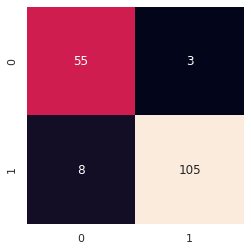

In [ ]:
param_grid = [{'n_neighbors' : [1,3,5,7,9,11], 'metric' : ['euclidean']},
              {'n_neighbors' : [1,3,5,7,9,11], 'metric' : ['mahalanobis'],
               'metric_params': [{'V': np.cov(np.transpose(train_x))}]}]
n_folds = 9
base_KNN = grid_search(train_x, param_grid, n_folds, train_y)
pred_y_test, pred_y_train = predict_values(base_KNN, test_x, train_x)
scoring(pred_y_test, pred_y_train, test_y, train_y)

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)
scaled_test_x = scaler.transform(test_x)

Combinazione migliore:
 {'metric': 'euclidean', 'n_neighbors': 7}
Accuratezza media della combinazione migliore: 0.973
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       149
           1       0.97      0.99      0.98       249

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.97      0.97       398



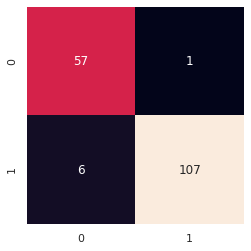

In [ ]:
param_grid = [{'n_neighbors' : [1,3,5,7,9,11], 'metric' : ['euclidean']},
              {'n_neighbors' : [1,3,5,7,9,11], 'metric' : ['mahalanobis'],
               'metric_params': [{'V': np.cov(np.transpose(scaled_train_x))}]}]
n_folds = 9
scaled_KNN = grid_search(scaled_train_x, param_grid, n_folds, train_y)
scaled_pred_y_test, scaled_pred_y_train = predict_values(scaled_KNN, scaled_test_x, scaled_train_x)
scoring(scaled_pred_y_test, scaled_pred_y_train, test_y, train_y)

In [ ]:
'''sigma = np.cov(np.transpose(scaled_train_x))
w,v = la.eig(sigma)
w.sort()
i = 29
max_sum = sum(w)
current_sum = w[29]
ratio = current_sum/max_sum

while(ratio <.95):
  #print(ratio,w[i:],i,'\n')
  current_sum = sum(w[i:])
  ratio = current_sum/max_sum
  i = i-1
  
n_components = x.shape[1]-(i+1)
print(n_components)'''

preservedInfo = .95
pca = PCA(preservedInfo)
pca.fit(scaled_train_x)
reduced_train_x, reduced_test_x = pca.transform(scaled_train_x), pca.transform(scaled_test_x)
print(reduced_train_x.shape, reduced_test_x.shape)


(398, 10) (171, 10)


Combinazione migliore:
 {'metric': 'euclidean', 'n_neighbors': 7}
Accuratezza media della combinazione migliore: 0.968
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        63
           1       0.94      0.99      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       149
           1       0.96      0.99      0.98       249

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



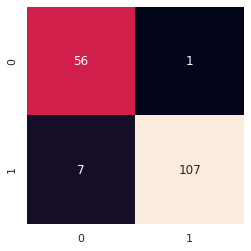

In [ ]:
param_grid = [{'n_neighbors' : [1,3,5,7,9,11], 'metric' : ['euclidean']},
              {'n_neighbors' : [1,3,5,7,9,11], 'metric' : ['mahalanobis'],
               'metric_params': [{'V': np.cov(np.transpose(reduced_train_x))}]}]
n_folds = 9
reduced_KNN = grid_search(reduced_train_x, param_grid, n_folds, train_y)
reduced_pred_y_test, reduced_pred_y_train = predict_values(reduced_KNN, reduced_test_x, reduced_train_x)
scoring(reduced_pred_y_test, reduced_pred_y_train, test_y, train_y)


Combinazione migliore:
 {'metric': 'euclidean', 'n_neighbors': 11}
Accuratezza media della combinazione migliore: 0.985
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       149
           1       0.99      0.99      0.99       249

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



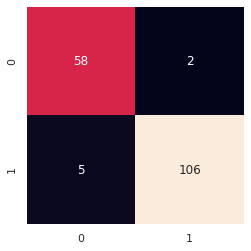

In [ ]:
lda = LDA()
lda.fit(scaled_train_x, train_y)
reduced_train_x_lda, reduced_test_x_lda = lda.transform(scaled_train_x), lda.transform(scaled_test_x)
param_grid = [{'n_neighbors' : [1,3,5,7,9,11], 'metric' : ['euclidean']}]
n_folds = 9
reduced_lda_KNN = grid_search(reduced_train_x_lda, param_grid, n_folds, train_y)
reduced_lda_pred_y_test, reduced_lda_pred_y_train = predict_values(reduced_lda_KNN, reduced_test_x_lda, reduced_train_x_lda)
scoring(reduced_lda_pred_y_test, reduced_lda_pred_y_train, test_y, train_y)

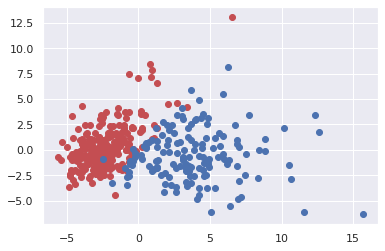

In [ ]:
pca2 = PCA(2)
figure_x_pca = pca2.fit_transform(scaled_train_x)
index1 = find_indices(train_y,1)
index2 = find_indices(train_y,0)
x1,x2 = figure_x_pca[index1], figure_x_pca[index2] 
plot(x1, x2)